In [1]:
import numpy as np
import pandas as pd
from math import log
import math
from statistics import mean


In [2]:
import json
def parse_json(s):
    try:
        return json.loads(s)
    except json.JSONDecodeError:
        return None

In [3]:
manufacturers = pd.read_csv("Dataset/verusen_manufacturer_names_materialdetail_export_11032022.csv")
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)
#new_data = pd.read_csv("Dataset/verusen_manufacturer_names_materialdetail_export_11032022.csv")


In [4]:
manufacturers

manufacturer_name  num_materials  num_stock_materials  average_value  \
0                 -            102                   79     803.395539   
1                 .              1                    0       0.000000   
2                 *              1                    1       1.000000   
3                 0              2                    0     110.485208   
4        0000200000              5                    5     192.254000   

                                     material_groups  \
0  ["-","-","-","-","-","-","-","-","-","-","-","...   
1                                        ["0200025"]   
2                                             [null]   
3                                        ["25","25"]   
4  ["26100000","26100000","26100000","26100000","...   

                               material_descriptions  
0  ["ELEMENT, OVRLD PROTECT, ELE-O-36PT, 33.5A,PR...  
1          ["TERMORESISTENCIA PT100 6MM 424,00MM ."]  
2  ["AIR INGERSOLL,REGULATOR,REGULATOR AIR INGERS...  
3  ["POLE EXT TELESCOPIC 72-360\"L TF900","GRABBE...  
4  ["MOTORELECTRIC:26KW460VAC 44.5A 60HZ","MOTORE...

In [6]:
manufacturers = manufacturers[500:]

In [7]:
manufacturers.shape

(70609, 6)

In [5]:
from sklearn.preprocessing import LabelBinarizer
manufacturers['material_groups_new']  = manufacturers.material_groups.apply(str).apply(parse_json)
materials_manufacturer_matgrpcategories = manufacturers.explode('material_groups_new')
# Drop NONE Rows
materials_manufacturer_matgrpcategories.dropna(inplace = True)

# materials_manufacturer_matgrpcategories['vectors'] = [row for row in LabelBinarizer().fit_transform(materials_manufacturer_matgrpcategories['material_groups_new'])]
# materials_manufacturer_matgrpcategories.set_index('manufacturer_name')

In [6]:
materials_manufacturer_matgrpcategories.columns

Index(['manufacturer_name', 'num_materials', 'num_stock_materials',
       'average_value', 'material_groups', 'material_descriptions',
       'material_groups_new'],
      dtype='object')

In [7]:
materials_manufacturer_matgrpcategories.drop(['material_groups','material_descriptions',],axis = 1,inplace = True)

In [8]:
materials_manufacturer_matgrpcategories

manufacturer_name  num_materials  num_stock_materials  average_value  \
0                     -            102                   79     803.395539   
0                     -            102                   79     803.395539   
0                     -            102                   79     803.395539   
0                     -            102                   79     803.395539   
0                     -            102                   79     803.395539   
...                 ...            ...                  ...            ...   
71107               ZZ2             18                    6      38.385556   
71107               ZZ2             18                    6      38.385556   
71107               ZZ2             18                    6      38.385556   
71107               ZZ2             18                    6      38.385556   
71107               ZZ2             18                    6      38.385556   

      material_groups_new  
0                       -  
0                       -  
0                       -  
0                       -  
0                       -  
...                   ...  
71107                   -  
71107                   -  
71107                   -  
71107                   -  
71107                   -  

[14020633 rows x 5 columns]

In [9]:
materials_manufacturer_matgrpcategories = mat_grp_mapping.merge(materials_manufacturer_matgrpcategories,how = 'inner',left_on = 'material_group',right_on = 'material_groups_new')

In [10]:
materials_manufacturer_matgrpcategories['material_groups_new'] = materials_manufacturer_matgrpcategories['Category L1']

In [11]:
materials_manufacturer_matgrpcategories = materials_manufacturer_matgrpcategories[materials_manufacturer_matgrpcategories['material_groups_new'].notna()]

In [12]:
materials_manufacturer_matgrpcategories.head()

Unnamed: 0 Category L1         material_group manufacturer_name  \
133376         NaN   Abrasives  8511-COATED ABRASIVES                3M   
133377         NaN   Abrasives  8511-COATED ABRASIVES                3M   
133378         NaN   Abrasives  8511-COATED ABRASIVES                3M   
133379         NaN   Abrasives  8511-COATED ABRASIVES                3M   
133380         NaN   Abrasives  8511-COATED ABRASIVES                3M   

        num_materials  num_stock_materials  average_value material_groups_new  
133376         104801                 7313     250.222914           Abrasives  
133377         104801                 7313     250.222914           Abrasives  
133378         104801                 7313     250.222914           Abrasives  
133379         104801                 7313     250.222914           Abrasives  
133380         104801                 7313     250.222914           Abrasives

In [141]:
materialgroups_onehot = LabelBinarizer()
materialgroups_onehot.fit(materials_manufacturer_matgrpcategories["material_groups_new"])

LabelBinarizer()

In [142]:
len(materialgroups_onehot.classes_)

33

In [158]:
materials_manufacturer_matgrpcategories.reset_index(drop=True,inplace = True)

In [40]:
res = pd.DataFrame()

In [143]:
from scipy.sparse import csr_matrix
from scipy.sparse import vstack

In [91]:
csr_matrix(res)

<1000x15586 sparse matrix of type '<class 'numpy.int64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [93]:
new = []

In [144]:
#materials_manufacturer_matgrpcategories.drop(['vectors'],axis = 1,inplace = True)
materials_manufacturer_matgrpcategories['vectors'] = None

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_8245/3732654460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  materials_manufacturer_matgrpcategories['vectors'] = None


In [173]:
new = []
for i in range(0,materials_manufacturer_matgrpcategories.shape[0],1000):

    res = materialgroups_onehot.transform(materials_manufacturer_matgrpcategories['material_groups_new'][i:i+1000])
    new.append(csr_matrix(res))
    
    

In [176]:
vect

<9320510x33 sparse matrix of type '<class 'numpy.int64'>'
	with 9320510 stored elements in COOrdinate format>

In [175]:
vect = vstack(new).tocoo()

In [260]:
temp_df = pd.DataFrame.sparse.from_spmatrix(vect).groupby(materials_manufacturer_matgrpcategories['manufacturer_name']).apply(lambda x:x.sum(axis = 0))

In [261]:
temp_df.loc[:, (temp_df != 0).any(axis=0)]

0    1   2   3   4   5   6   7   8   9   ...  23  24  \
manufacturer_name                                                 ...           
A & F MACHINE PRODUCTS    0   10   0   0   0   1   0   0   0  14  ...   0   1   
A & M INDUSTRIES          0    4   0   0   0   0   0   0   0   0  ...   0   0   
A & S FERSA               0    6   0   0   0   0   0   0   0   0  ...   0   0   
A & S PIN PRODUCTS INC.   0    0   0   0   0   0   0   0   0   0  ...   0   0   
A F CHAPMAN CORPORATION   4    0   0   0   0   0   0   0   0   0  ...   0   1   
...                      ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..   
ZURN                      0   16   0   0   0   1   5   0   5   0  ...   0  43   
ZURN INDUSTRIES, INC.     0   12   0   0   0   9   0   0  30  12  ...   2   6   
ZVL-ZKL BEARINGS CORP     0  906   0   0   0   0   0   0   0   2  ...   0   0   
ZWEI, INC.                0    3   0   0   0   0   0   0   0  25  ...   0   0   
ZXZ  (CHINA)              0    1   0   0   0   0   0   0   2   1  ...   0   5   

                         25  26  27  28  29  30  31  32  
manufacturer_name                                        
A & F MACHINE PRODUCTS    0   0  59   0   0   0   1   0  
A & M INDUSTRIES          0   0   0   0   0   0   0   0  
A & S FERSA               0   0   0   0   0   0   0   0  
A & S PIN PRODUCTS INC.   0   0   0   0   0   6   0   0  
A F CHAPMAN CORPORATION   0   0   0   0   0   0   0   0  
...                      ..  ..  ..  ..  ..  ..  ..  ..  
ZURN                      0   0   1   0   0   0   2   0  
ZURN INDUSTRIES, INC.     0   0   4   1   0   2   6   0  
ZVL-ZKL BEARINGS CORP     0   0   0   0   0   0   0   0  
ZWEI, INC.                0   0  13   0   0   0   0   0  
ZXZ  (CHINA)              0   0   1   0   0   0   0   0  

[23389 rows x 33 columns]

In [3]:
#temp_df.to_csv("Dataset/Material_OneHot.csv",index = True)
temp_df_1 = pd.read_csv("Dataset/Material_OneHot.csv")

In [4]:
temp_df_1

manufacturer_name  0    1  2  3  4  5  6  7   8  ...  23  24  25  \
0       A & F MACHINE PRODUCTS  0   10  0  0  0  1  0  0   0  ...   0   1   0   
1             A & M INDUSTRIES  0    4  0  0  0  0  0  0   0  ...   0   0   0   
2                  A & S FERSA  0    6  0  0  0  0  0  0   0  ...   0   0   0   
3      A & S PIN PRODUCTS INC.  0    0  0  0  0  0  0  0   0  ...   0   0   0   
4      A F CHAPMAN CORPORATION  4    0  0  0  0  0  0  0   0  ...   0   1   0   
...                        ... ..  ... .. .. .. .. .. ..  ..  ...  ..  ..  ..   
23384                     ZURN  0   16  0  0  0  1  5  0   5  ...   0  43   0   
23385    ZURN INDUSTRIES, INC.  0   12  0  0  0  9  0  0  30  ...   2   6   0   
23386    ZVL-ZKL BEARINGS CORP  0  906  0  0  0  0  0  0   0  ...   0   0   0   
23387               ZWEI, INC.  0    3  0  0  0  0  0  0   0  ...   0   0   0   
23388             ZXZ  (CHINA)  0    1  0  0  0  0  0  0   2  ...   0   5   0   

       26  27  28  29  30  31  32  
0       0  59   0   0   0   1   0  
1       0   0   0   0   0   0   0  
2       0   0   0   0   0   0   0  
3       0   0   0   0   6   0   0  
4       0   0   0   0   0   0   0  
...    ..  ..  ..  ..  ..  ..  ..  
23384   0   1   0   0   0   2   0  
23385   0   4   1   0   2   6   0  
23386   0   0   0   0   0   0   0  
23387   0  13   0   0   0   0   0  
23388   0   1   0   0   0   0   0  

[23389 rows x 34 columns]

In [5]:
temp_df_1.columns[1:]

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32'],
      dtype='object')

In [6]:
temp_df_1['combined'] = temp_df_1[temp_df_1.columns[1:]].apply(lambda row: ','.join(row.values.astype(str)), axis=1)


In [7]:
temp_df_1.drop(columns = temp_df_1.columns[1:34],inplace = True)

In [8]:
res = pd.read_csv('Dataset/New_data.csv',index_col=None)

## Merge the material vector with old data

In [9]:
merged_data= temp_df_1.merge(res,how = 'inner',left_on = 'manufacturer_name',right_on = 'Company_A').drop(columns = ['manufacturer_name'])
#merged_data.rename(columns = {'combined':'combined_A'})
res= temp_df_1.merge(merged_data,how = 'inner',left_on = 'manufacturer_name',right_on = 'Company_B').drop(columns = ['manufacturer_name'])
res.rename(columns = {'combined_x':'combined_B','combined_y':'combined_A'},inplace = True)

In [10]:
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import multiprocessing

# def clean_data(text):
#     text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
#     text = re.sub(r'[\\/×\^\]\[÷]', '', text)
#     return text

def clean_data(text):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',text)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned


def change_lower(text):
    text = text.lower()
    return text

stopwords_list = stopwords.words("english")
def remover(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list]
    text = ' '.join(final_list)
    return text

def get_w2vdf(df):
    w2v_df = pd.DataFrame(df["Company_A"]).values.tolist()
    for i in range(len(w2v_df)):
        w2v_df[i] = w2v_df[i][0].split(" ")
    return w2v_df

def train_w2v(w2v_df):
    cores = multiprocessing.cpu_count()
    w2v_model = Word2Vec(min_count=5,
                         window=1,
                         #size=300, 
                         alpha=0.03, 
                         min_alpha=0.0007, 
                         sg = 1,
                         workers=cores-1)
    w2v_model.build_vocab(w2v_df, progress_per=100)
    w2v_model.train(w2v_df, total_examples=w2v_model.corpus_count, epochs=100, report_delay=1)
    return w2v_model

In [11]:
res[['Company_A']] = res[['Company_A']].astype(str)
res['Company_A'] = res['Company_A'].apply(change_lower)
res['Company_A'] = res['Company_A'].apply(clean_data)
res['Company_A'] = res['Company_A'].apply(remover)

res[['Company_B']] = res[['Company_B']].astype(str)
res['Company_B'] = res['Company_B'].apply(change_lower)
res['Company_B'] = res['Company_B'].apply(clean_data)
res['Company_B'] = res['Company_B'].apply(remover)

res[['mat_desc_A']] = res[['mat_desc_A']].astype(str)
res['mat_desc_A'] = res['mat_desc_A'].apply(change_lower)
res['mat_desc_A'] = res['mat_desc_A'].apply(clean_data)
res['mat_desc_A'] = res['mat_desc_A'].apply(remover)

res[['mat_desc_B']] = res[['mat_desc_B']].astype(str)
res['mat_desc_B'] = res['mat_desc_B'].apply(change_lower)
res['mat_desc_B'] = res['mat_desc_B'].apply(clean_data)
res['mat_desc_B'] = res['mat_desc_B'].apply(remover)

res[['mat_grp_A']] = res[['mat_grp_A']].astype(str)
res['mat_grp_A'] = res['mat_grp_A'].apply(change_lower)
res['mat_grp_A'] = res['mat_grp_A'].apply(clean_data)
res['mat_grp_A'] = res['mat_grp_A'].apply(remover)

res[['mat_grp_B']] = res[['mat_grp_B']].astype(str)
res['mat_grp_B'] = res['mat_grp_B'].apply(change_lower)
res['mat_grp_B'] = res['mat_grp_B'].apply(clean_data)
res['mat_grp_B'] = res['mat_grp_B'].apply(remover)



In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

In [186]:
avg_len = ((res["Company_A"].str.len()).median()+(res["Company_B"].str.len()).median())/2

In [187]:
avg_len

12.5

In [188]:
from similarity.jarowinkler import JaroWinkler
from pyjarowinkler import distance
res["jarowinkler_sim_penalty"] = [distance.get_jaro_distance(i,j)*(math.exp(-max(0,avg_len/mean([len(i),len(j)])  - 1))) for i,j in zip(res["Company_A"],res["Company_B"])]
res["jarowinkler_sim"] = [distance.get_jaro_distance(i,j) for i,j in zip(res["Company_A"],res["Company_B"])]

In [189]:
res['ab'] = res.apply(lambda x : x['Company_A'] + ' ' + x['Company_B'], axis=1)

clf_1 = TfidfVectorizer(ngram_range=(1, 1))
clf_1.fit(res['ab'])


tfidf_a = clf_1.transform(res['Company_A'])
tfidf_b = clf_1.transform(res['Company_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_a[x],tfidf_b[x]) for x in range(len(tfidf_a)) ]
# res['Company_AB'] = row_similarities

res['Company_AB'] = np.diag(cosine_similarity(tfidf_a, tfidf_b))




In [22]:
res['grp_ab'] = res.apply(lambda x : x['mat_grp_A'] + ' ' + x['mat_grp_B'], axis=1)

clf_2 = TfidfVectorizer(ngram_range=(1, 1))
clf_2.fit(res['grp_ab'])


tfidf_grp_a = clf_2.transform(res['mat_grp_A'])
tfidf_grp_b = clf_2.transform(res['mat_grp_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_grp_a[x],tfidf_grp_b[x]) for x in range(len(tfidf_grp_a)) ]
res['Group_AB'] = np.diag(cosine_similarity(tfidf_grp_a,tfidf_grp_b))


In [23]:
res['desc_ab'] = res.apply(lambda x : x['mat_desc_A'] + ' ' + x['mat_desc_B'], axis=1)

clf_3 = TfidfVectorizer(ngram_range=(1, 1))
clf_3.fit(res['desc_ab'])


tfidf_desc_a = clf_3.transform(res['mat_desc_A'])
tfidf_desc_b = clf_3.transform(res['mat_desc_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_grp_a[x],tfidf_grp_b[x]) for x in range(len(tfidf_grp_a)) ]
res['Desc_AB'] = np.diag(cosine_similarity(tfidf_desc_a,tfidf_desc_b))


In [24]:
res['cat_ab'] = res.apply(lambda x : x['combined_A'] + ' ' + x['combined_B'], axis=1)

clf_4 = TfidfVectorizer(ngram_range=(1, 1))
clf_4.fit(res['cat_ab'])


tfidf_cat_a = clf_4.transform(res['combined_A'])
tfidf_cat_b = clf_4.transform(res['combined_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_grp_a[x],tfidf_grp_b[x]) for x in range(len(tfidf_grp_a)) ]
res['Cat_AB'] = np.diag(cosine_similarity(tfidf_cat_a,tfidf_cat_b))


In [151]:
#res['log_mat_grp_AB'] = math.log(abs(res['no_mat_A']-res['no_mat_B']))
#res["log_mat_grp_AB"] = [np.log(abs(i-j)) for i,j in zip(res["no_mat_A"],res["no_mat_B"])]
res["log_stock_no_AB"] = [(abs(np.log(i)-np.log(j))) for i,j in zip(res["no_stock_A"],res["no_stock_B"])]
res["log_mat_grp_AB"] = [(abs(np.log(i)-np.log(j))) for i,j in zip(res["no_mat_A"],res["no_mat_B"])]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_33046/1098693937.py:3: RuntimeWarning: divide by zero encountered in log
  res["log_stock_no_AB"] = [(abs(np.log(i)-np.log(j))) for i,j in zip(res["no_stock_A"],res["no_stock_B"])]


In [190]:
df = res[['Company_A', 'Company_B', 'Label','Company_AB','jarowinkler_sim','jarowinkler_sim_penalty','Group_AB','Desc_AB','Cat_AB','no_mat_A','no_mat_B', 'no_stock_A','no_stock_B','avg_val_A','avg_val_B','log_mat_grp_AB','log_stock_no_AB']]

In [155]:
# Convert the labels of data as Label 1 and other data Label 0
df['Label'].iloc[df['Label'] != 1] = 0

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_33046/609417635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'].iloc[df['Label'] != 1] = 0


/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_33046/647140751.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot:>

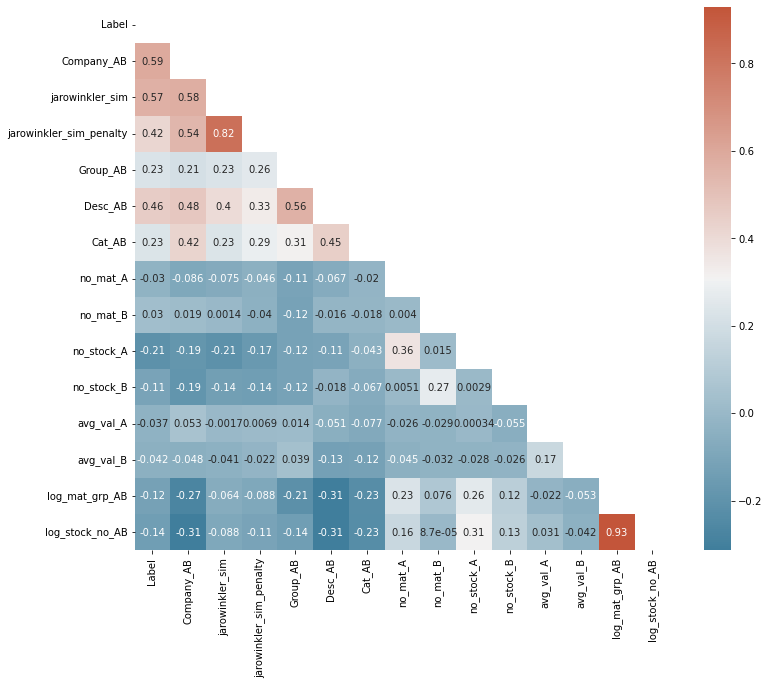

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
#
#
df.columns = ['Company_A', 'Company_B','Label', 'Company_AB','jarowinkler_sim','jarowinkler_sim_penalty','Group_AB','Desc_AB','Cat_AB', 'no_mat_A','no_mat_B',
       'no_stock_A','no_stock_B','avg_val_A','avg_val_B','log_mat_grp_AB','log_stock_no_AB']
#
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [191]:
df = df[['Company_A','Company_B','Company_AB','jarowinkler_sim','jarowinkler_sim_penalty','Group_AB','Desc_AB','log_mat_grp_AB','log_stock_no_AB','Label']]

In [192]:
res[res['Company_A']=='nsk']

combined_B  \
364  0,284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...   
583  0,15311,0,0,0,88,395,0,21,18,0,1,0,4,17,0,2,0,...   
670  0,62105,0,0,0,10,41,0,7,12,0,78,0,0,935,0,0,0,...   

                                            combined_A Company_A  \
364  0,201,0,0,0,2,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,...       nsk   
583  0,201,0,0,0,2,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,...       nsk   
670  0,201,0,0,0,2,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,...       nsk   

        Company_B  Label  no_mat_A  no_stock_A  \
364  nsk bearings    1.0      1105         567   
583           skf    0.0      1105         567   
670        timken    4.0      1105         567   

                                             mat_grp_A  \
364  {c67 bearing roller er12200 null bearing gnrl ...   
583  {c67 bearing roller er12200 null bearing gnrl ...   
670  {c67 bearing roller er12200 null bearing gnrl ...   

                                            mat_desc_A   avg_val_A  ...  \
364  {ya11204ja1 bearing roller hk3020 2rs roller  ...  285.627522  ...   
583  {ya11204ja1 bearing roller hk3020 2rs roller  ...  285.627522  ...   
670  {ya11204ja1 bearing roller hk3020 2rs roller  ...  285.627522  ...   

                   ab  Company_AB  \
364  nsk nsk bearings    0.722769   
583           nsk skf    0.000000   
670        nsk timken    0.000000   

                                                grp_ab  Group_AB  \
364  {c67 bearing roller er12200 null bearing gnrl ...  0.232579   
583  {c67 bearing roller er12200 null bearing gnrl ...  0.592245   
670  {c67 bearing roller er12200 null bearing gnrl ...  0.038816   

                                               desc_ab   Desc_AB  \
364  {ya11204ja1 bearing roller hk3020 2rs roller  ...  0.701556   
583  {ya11204ja1 bearing roller hk3020 2rs roller  ...  0.778980   
670  {ya11204ja1 bearing roller hk3020 2rs roller  ...  0.233934   

                                                cat_ab Cat_AB  log_mat_grp_AB  \
364  0,201,0,0,0,2,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,...    0.0        0.648027   
583  0,201,0,0,0,2,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,...    0.0        3.137617   
670  0,201,0,0,0,2,3,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,...    0.0        4.212416   

    log_stock_no_AB  
364        0.211309  
583        3.540064  
670        2.848042  

[3 rows x 27 columns]

In [159]:
df.replace([np.inf, -np.inf], 0, inplace=True)

In [193]:
df

Company_A             Company_B  Company_AB  \
0               accuform signs        accuform signs    1.000000   
1       action instruments inc            action pak    0.532293   
2        aes engineered system  albany engineered sy    0.314900   
3           allegro industries    allegro industries    1.000000   
4                   allenbradl         allen bradley    0.000000   
..                         ...                   ...         ...   
790  schneider packaging equip       yale & towne co    0.000000   
791                       yale            yale hoist    0.691134   
792                       yale           yale hoists    0.669288   
793                   yakasawa               yaskawa    0.000000   
794  johnson yokogawa corporat              yokogawa    0.615164   

     jarowinkler_sim  jarowinkler_sim_penalty  Group_AB   Desc_AB  \
0               1.00                 1.000000  1.000000  1.000000   
1               0.80                 0.800000  0.635141  0.261042   
2               0.80                 0.800000  0.627817  0.125710   
3               1.00                 1.000000  1.000000  1.000000   
4               0.95                 0.870881  0.734934  0.818097   
..               ...                      ...       ...       ...   
790             0.38                 0.380000  0.438909  0.023492   
791             0.88                 0.401099  0.048421  0.066501   
792             0.87                 0.446673  0.003422  0.526345   
793             0.89                 0.456941  0.913362  0.577512   
794             0.44                 0.440000  0.162966  0.371286   

     log_mat_grp_AB  log_stock_no_AB  Label  
0          0.000000         0.000000    1.0  
1          0.712195         0.857450    4.0  
2          1.076139         0.993252    0.0  
3          0.000000         0.000000    1.0  
4          4.469230         4.227490    1.0  
..              ...              ...    ...  
790        5.517453         4.686750    0.0  
791        6.270988         6.561031    1.0  
792        0.548493         1.842532    1.0  
793        3.421233         3.105483    1.0  
794        4.570579         3.834553    4.0  

[795 rows x 10 columns]

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import cohen_kappa_score

In [162]:
Counter(df['Label'])

Counter({1.0: 254, 0.0: 541})

In [163]:
df.shape

(795, 10)

In [164]:
# Assign values to the X and y variables:
X = df.iloc[:, :9].values
y = df.iloc[:, 9].values 

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=135)

In [166]:
X_train_new = [x[2:] for x in X_train]
X_test_new = [x[2:] for x in X_test]

In [167]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train_new)
X_train_new = imp.transform(X_train_new)
X_test_new = imp.transform(X_test_new) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_new = scaler.transform(X_train_new)
X_test_new = scaler.transform(X_test_new) 

In [168]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_new, y_train) 

KNeighborsClassifier()

In [169]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test_new)

In [170]:
# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict))

[[101   3]
 [ 18  37]]
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       104
         1.0       0.93      0.67      0.78        55

    accuracy                           0.87       159
   macro avg       0.89      0.82      0.84       159
weighted avg       0.88      0.87      0.86       159

0.8679245283018868


In [171]:
cohen_kappa_score(y_test, y_predict)

0.6880896777206913

In [172]:
# Gaussian Classifier
from sklearn.naive_bayes import GaussianNB

# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(X_train_new, y_train)
# Make predictions with the classifier:
predictive_labels = gnb.predict(X_test_new)
# print(predictive_labels)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictive_labels))

0.8553459119496856


In [173]:
cohen_kappa_score(y_test, predictive_labels)

0.6614829214107192

In [174]:
# Random Forest Classifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train_new,y_train)
predictionforest = trainedforest.predict(X_test_new)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictionforest))


[[102   2]
 [ 18  37]]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       104
         1.0       0.95      0.67      0.79        55

    accuracy                           0.87       159
   macro avg       0.90      0.83      0.85       159
weighted avg       0.88      0.87      0.87       159

0.8742138364779874


In [175]:
cohen_kappa_score(y_test, predictionforest)

0.7015765765765767

In [176]:
# Check Missclassified Data - Random Forest 
df = pd.DataFrame()
df['Actual'] = y_test
df['Predicted'] = predictionforest
df_1 = pd.DataFrame(X_test,columns = ['Company_A','Company_B', 'Company_AB','jarowinkler_sim','jarowinkler_sim_penalty','Group_AB','Desc_AB','log_mat_grp_AB','log_stock_no_AB'])
df_1 = df_1.join(df)

In [177]:
df_1[df_1['Actual']!=df_1['Predicted']][df_1['Predicted'] == 1]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_33046/3767610499.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1[df_1['Actual']!=df_1['Predicted']][df_1['Predicted'] == 1]


Company_A          Company_B Company_AB jarowinkler_sim  \
52    fisher  fisher scientific   0.674349            0.87   
82  thompson    thomson bearing        0.0            0.87   

   jarowinkler_sim_penalty  Group_AB   Desc_AB log_mat_grp_AB log_stock_no_AB  \
52                0.754644  0.207025   0.28976       1.350726        2.121394   
82                0.754644  0.490283  0.220693       1.150572        1.167605   

    Actual  Predicted  
52     0.0        1.0  
82     0.0        1.0

In [179]:
df_1[df_1['Actual']!=df_1['Predicted']][df_1['Predicted'] == 0]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_33046/1869793991.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1[df_1['Actual']!=df_1['Predicted']][df_1['Predicted'] == 0]


Company_A                  Company_B Company_AB  \
3           schneider electric             square company        0.0   
11      control technology inc                        cti        0.0   
22              eaton air flex                     fawick        0.0   
23                  alliamachs   alliance machine systems        0.0   
25    schneider automation inc         schneider electric   0.518354   
26             parker hannifin           parker pneumatic   0.373164   
28            smc corp america                 smcpneumai        0.0   
29                ge multiline   general electric company        0.0   
60                  amedrexeng         ametek drexelbrook        0.0   
61            btg americas inc                eur control        0.0   
70                 det-tronics  detector electronics corp        0.0   
71                warnerelectr            warner electric        0.0   
80                     redlion           red lion control        0.0   
84           cooper bearing co               cooper split    0.48316   
90   siemens applied automatio      siemens energy automa    0.23361   
96                      baldor                   reliance        0.0   
101                 letourneau  le tourneau sales & srv c        0.0   
120    global industrial  inc                       globe        0.0   

    jarowinkler_sim jarowinkler_sim_penalty  Group_AB   Desc_AB  \
3              0.53                    0.53  0.112195  0.352347   
11             0.51                0.484706  0.755913  0.435314   
22             0.41                0.299637  0.910385  0.225776   
23             0.83                    0.83  0.711667  0.348359   
25             0.85                    0.85  0.026232  0.051604   
26             0.84                    0.84   0.49202  0.510713   
28             0.77                0.761995  0.015686  0.130515   
29             0.67                    0.67  0.409063  0.026329   
60             0.77                    0.77  0.139553  0.018095   
61             0.38                    0.38  0.466442  0.058175   
70             0.71                    0.71  0.022006  0.121901   
71             0.96                    0.96  0.083395  0.086599   
80             0.87                0.754644  0.370704  0.018246   
84             0.83                    0.83  0.714111   0.25685   
90             0.83                    0.83  0.717409  0.164961   
96             0.36                0.149838  0.587692  0.536444   
101            0.84                    0.84  0.181101  0.433085   
120            0.79                    0.79  0.897762  0.525505   

    log_mat_grp_AB log_stock_no_AB  Actual  Predicted  
3         2.475998        0.463573     1.0        0.0  
11        0.346871        0.405465     1.0        0.0  
22        0.771399        0.680877     1.0        0.0  
23        4.270642        5.141664     1.0        0.0  
25        7.946466        4.859812     1.0        0.0  
26        4.582296        4.118698     1.0        0.0  
28       11.897223         7.47055     1.0        0.0  
29        9.540148        9.343997     1.0        0.0  
60        3.905334        3.412247     1.0        0.0  
61        2.495718             0.0     1.0        0.0  
70        0.339868          1.7492     1.0        0.0  
71        7.407924        5.869297     1.0        0.0  
80        2.014903             0.0     1.0        0.0  
84        3.789855        4.143135     1.0        0.0  
90        3.112033        3.178054     1.0        0.0  
96        0.537406        0.391932     1.0        0.0  
101        4.70953             0.0     1.0        0.0  
120       0.577099         0.35794     1.0        0.0

In [180]:
df_1[df_1['Actual']==df_1['Predicted']][df_1['Predicted'] == 1]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_33046/1261294679.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1[df_1['Actual']==df_1['Predicted']][df_1['Predicted'] == 1]


Company_A                  Company_B Company_AB  \
2               diamondcha           diamond chain co        0.0   
4                  nordson               nordson corp   0.855543   
5                   diagra                   diagraph        0.0   
7                donaldson      donaldson company inc   0.777824   
9               cutlerhamm              cutler hammer        0.0   
12                  toledo               toledo scale   0.707107   
16                     sti             sti corporatio   0.725896   
19   scott health & safety      scott health & safety        1.0   
34                    lima        limab north america        0.0   
36        toshiba electric  toshiba international cor   0.449747   
38                wilkerso                  wilkerson        0.0   
42                     sti            sti corporation   0.813564   
43                 vickers            vickers esd inc   0.625057   
47             wilden pump               wilden pumps    0.64994   
49               bellofram            marsh bellofram   0.722727   
51        revco industries           revco industries        1.0   
55                  mitsub                 mitsubishi        0.0   
58               geomartin                 geo martin        0.0   
74         esco corporatio                   esco inc   0.748673   
77                    sick                 sick optic   0.684055   
89                   moore          moore products co   0.678833   
97                     mac             mac valves inc   0.670991   
102               yakasawa                    yaskawa        0.0   
106   john tillman company       john tillman company        1.0   
121                   ross         ross hill controls   0.601061   
124                  eaton             eaton electric    0.80063   
125              universal    universal electric corp   0.772338   
127          bosch rexroth                    rexroth    0.69259   
129             allenbradl              allen bradley        0.0   
134          inpro  pumps          inpro seal company   0.538318   
139                  dayto                     dayton        0.0   
140                   sola  sola   hevi-duty electric   0.557702   
142                 nugent       wm w nugent & co inc   0.635085   
145                 banner    banner engineering corp   0.660857   
146                   beck              beck electric   0.853196   
151                tidland        tidland corporation   0.859227   
157             rosshillco         ross hill controls        0.0   

    jarowinkler_sim jarowinkler_sim_penalty  Group_AB   Desc_AB  \
2              0.92                0.910436  0.895876  0.674169   
4              0.92                0.627443  0.017639  0.918479   
5              0.95                0.395406  0.557665  0.726424   
7              0.89                    0.89  0.936421  0.739623   
9              0.95                0.824036  0.707889  0.286738   
12              0.9                0.568417  0.004255  0.484989   
16             0.82                0.475283  0.663121  0.098132   
19              1.0                     1.0       1.0       1.0   
34             0.84                0.728621  0.357478  0.528861   
36             0.85                    0.85  0.980064  0.820275   
38             0.98                0.568021  0.444728   0.42156   
42             0.81                0.511576  0.616105  0.111321   
43             0.89                0.732932  0.794568  0.770496   
47             0.98                0.850058  0.102598  0.748008   
49             0.39                0.354778  0.155773  0.082657   
51              1.0                     1.0       1.0       1.0   
55             0.92                0.484149  0.813619  0.285968   
58             0.98                0.668363  0.543432  0.235906   
74             0.83                0.719947  0.084822  0.006027   
77             0.88                 0.36627  0.189531  0.739578   
89             0.86      

In [184]:
#df_1.to_excel("Output/Missclassified_data_all_features.xlsx")

In [182]:
df_1[df_1['Company_A']=='nsk']

Company_A Company_B Company_AB jarowinkler_sim jarowinkler_sim_penalty  \
1       nsk       skf        0.0            0.78                0.026594   

   Group_AB  Desc_AB log_mat_grp_AB log_stock_no_AB  Actual  Predicted  
1  0.592245  0.77898       3.137617        3.540064     0.0        0.0

In [194]:
df_1[df_1['Company_A'] == 'cutlerhamm']

Company_A      Company_B Company_AB jarowinkler_sim  \
9  cutlerhamm  cutler hammer        0.0            0.95   

  jarowinkler_sim_penalty  Group_AB   Desc_AB log_mat_grp_AB log_stock_no_AB  \
9                0.824036  0.707889  0.286738       4.554222        4.560173   

   Actual  Predicted  
9     1.0        1.0

In [195]:
df_1[df_1['Company_A'] == 'mitsub']

Company_A   Company_B Company_AB jarowinkler_sim jarowinkler_sim_penalty  \
55    mitsub  mitsubishi        0.0            0.92                0.484149   

    Group_AB   Desc_AB log_mat_grp_AB log_stock_no_AB  Actual  Predicted  
55  0.813619  0.285968       4.033995        3.977008     1.0        1.0

In [196]:
df_1[df_1['Company_A'] == 'wilkerso']

Company_A  Company_B Company_AB jarowinkler_sim jarowinkler_sim_penalty  \
38  wilkerso  wilkerson        0.0            0.98                0.568021   

    Group_AB  Desc_AB log_mat_grp_AB log_stock_no_AB  Actual  Predicted  
38  0.444728  0.42156       4.387779        4.472455     1.0        1.0